# **Fake News (News Credibility)**

**Libraries**

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import random
import pickle

# Natural Language Processing
from sklearn.feature_extraction.text import CountVectorizer

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Modeling
import sklearn.ensemble
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix,roc_curve,auc

In [2]:
url_ira = 'data/FakeNews/ira_tweets_csv_hashed_en_2014_2017_not_hashed.csv'
url_venezuela = 'data/FakeNews/venezuela_201901_2_tweets_csv_hashed.csv'

nlinesfile = 944661
nlinesrandomsample = 124500
lines2skip = np.random.choice(np.arange(1,nlinesfile+1), (nlinesfile-nlinesrandomsample), replace=False)
df_ira = pd.read_csv(url_ira, skiprows=lines2skip)

df_venezuela = pd.read_csv(url_venezuela)
# df_ira = pd.read_csv(url_ira)

In [3]:
url_news = 'data/FakeNews/abc_cbs_nbc_wsj_2014_2017.csv'
df_news = pd.read_csv(url_news)

In [4]:
# df_ira = df_ira.dropna(subset = ['tweet_text'])
# df_ira_en = df_ira[df_ira['tweet_language'].str.contains("en")==True]
# df_ira_en = df_ira_en[df_ira_en['user_display_name'].str.len() < 40]
# df_ira_en = df_ira_en.loc[(df_ira_en['tweet_time'] >= '2014-11-01 00:00') & (df_ira_en['tweet_time'] <= '2017-01-31 00:00')]
# df_ira_en.to_csv('data/FakeNews/ira_tweets_csv_hashed_en_2014_2017_not_hashed.csv', encoding='utf-8')
# df_ira_en.shape[0]

df_venezuela = df_venezuela.dropna(subset = ['tweet_text'])
# df_venezuela = df_venezuela[df_venezuela['tweet_language'].str.contains("en")==True]
df_venezuela = df_venezuela[df_venezuela['user_display_name'].str.len() < 40]
df_venezuela = df_venezuela.loc[(df_venezuela['tweet_time'] >= '2014-11-01 00:00') & (df_venezuela['tweet_time'] <= '2017-01-31 00:00')]
df_venezuela.to_csv('data/FakeNews/venezuela_201901_2_tweets_csv_hashed_en_2014_2017_not_hashed.csv', encoding='utf-8')

In [5]:
pd.set_option('display.max_columns',None)
df_ira.head(5)

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,account_language,tweet_language,tweet_text,tweet_time,tweet_client_name,in_reply_to_tweetid,in_reply_to_userid,quoted_tweet_tweetid,is_retweet,retweet_userid,retweet_tweetid,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
0,6.267400e+17,2.882332e+09,Jenna Abrams,Jenn_Abrams,USA,"Calm down, I'm not pro-Trump. I am pro-common ...",https://t.co/ZXoG0JPLdf,79152,22607,10/29/2014,en,en,#IfAnimalsMadeLaws all parrots would be equal ...,7/30/2015 13:04,Twitter Web Client,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0.0,0.0,2.0,1.0,"[IfAnimalsMadeLaws, EqualityForAll]",[],NaN,NaN
1,6.680440e+17,2.882332e+09,Jenna Abrams,Jenn_Abrams,USA,"Calm down, I'm not pro-Trump. I am pro-common ...",https://t.co/ZXoG0JPLdf,79152,22607,10/29/2014,en,en,And who will determine what exactly is #offens...,11/21/2015 12:33,TweetDeck,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0.0,3.0,15.0,12.0,[offensive],[],NaN,NaN
2,7.286370e+17,2.882332e+09,Jenna Abrams,Jenn_Abrams,USA,"Calm down, I'm not pro-Trump. I am pro-common ...",https://t.co/ZXoG0JPLdf,79152,22607,10/29/2014,en,en,You know that fat girls who believe in #BodyAc...,5/6/2016 17:25,Twitter Web Client,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0.0,5.0,59.0,34.0,[BodyAcceptance],[],NaN,NaN
3,7.484480e+17,3.978317e+09,BlackMatters,blackmattersus,NaN,Fast-growing black community. Latest news and ...,https://t.co/oBiVuggezq,20019,14112,10/22/2015,en,en,Getting richer will provide our communities mo...,6/30/2016 9:29,Twitter Web Client,NaN,NaN,7.480000e+17,False,NaN,NaN,absent,absent,0.0,0.0,23.0,24.0,[],[https://twitter.com/ReparationsAct/status/748...,NaN,NaN
4,5.965760e+17,2.753146e+09,Cleveland Online,OnlineCleveland,"City of Cleveland, USA","Breaking news, weather, traffic and more for C...",NaN,19351,8207,8/28/2014,en,en,"#local Free spring cook book, healthy chocolat...",5/8/2015 7:24,twitterfeed,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0.0,0.0,0.0,0.0,[local],[],NaN,NaN


In [6]:
df_venezuela.head(5)

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,account_language,tweet_text,tweet_time,tweet_client_name,in_reply_to_tweetid,in_reply_to_userid,quoted_tweet_tweetid,is_retweet,retweet_userid,retweet_tweetid,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
24201,825861435183886336,816235624353001475,Producer Trump.!,ProducerTrump,NaN,We have the best team to bring you the best ne...,NaN,0,23,2017-01-03,es,Bruce Arena's return to USMNT ends in goalless...,2017-01-30 00:21,dlvr.it,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0.0,0.0,0.0,0.0,[],[http://viid.me/qhDI2Q],[],NaN
24269,824883188518359040,816391363604385801,James With Trump,JamesWithTrump,NaN,Journalist especially dedicated to the preside...,NaN,0,20,2017-01-03,es,BEHNA: Liberal Snowflakes On Twitter Attack VP...,2017-01-27 07:34,dlvr.it,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0.0,0.0,0.0,0.0,[],[http://viid.me/qgEA2G],[],NaN
24498,826085850005909504,816391363604385801,James With Trump,JamesWithTrump,NaN,Journalist especially dedicated to the preside...,NaN,0,20,2017-01-03,es,Quebec Mosque Shooting Suspects are Mohamed Kh...,2017-01-30 15:13,dlvr.it,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0.0,0.0,0.0,0.0,[],[http://viid.me/qhCRSi],[],NaN
24503,824729832894275584,816343000292921344,Rebbeca With Trump,RebeccaWithTrum,NaN,Do you want to know more about me? Follow me a...,NaN,0,27,2017-01-03,es,"Trump's 'old, unsecured Android phone' poses m...",2017-01-26 21:24,dlvr.it,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0.0,0.0,0.0,0.0,[],[http://viid.me/qgxEiD],[],NaN
24518,825925052902182912,816235624353001475,Producer Trump.!,ProducerTrump,NaN,We have the best team to bring you the best ne...,NaN,0,23,2017-01-03,es,Protest held at Indianapolis airport after imm...,2017-01-30 04:34,dlvr.it,NaN,NaN,NaN,False,NaN,NaN,absent,absent,0.0,0.0,0.0,0.0,[],[http://viid.me/qhGTSn],[],NaN


In [7]:
df_news.head(5)

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,2017-01-30 23:58:01,CBSNews,NaN,70,49,89,"Iranian Oscar nominee Asghar Farhadi, who also...",NaN,NaN,NaN,826217939196137474,https://twitter.com/CBSNews/status/82621793919...
1,2017-01-30 23:56:03,WSJ,NaN,27,50,81,Small apartments selling for $2 million and up...,NaN,NaN,NaN,826217443290918912,https://twitter.com/WSJ/status/826217443290918912
2,2017-01-30 23:53:01,ABC,NaN,112,281,192,Suspect identified in Quebec City mosque shoot...,NaN,NaN,NaN,826216678296002560,https://twitter.com/ABC/status/826216678296002560
3,2017-01-30 23:49:31,ABC,ABC,62,185,307,"MORE: In letter, acting U.S. attorney general ...",NaN,NaN,NaN,826215799387852800,https://twitter.com/ABC/status/826215799387852800
4,2017-01-30 23:49:03,WSJ,NaN,2,18,23,Oil tanker owner Frontline makes hostile bid f...,NaN,NaN,NaN,826215682819907588,https://twitter.com/WSJ/status/826215682819907588


In [8]:
df_ira.shape[0]

124500

In [9]:
df_venezuela.shape[0]

11533

In [10]:
df_news.shape[0]

220976

In [11]:
df_ira = df_ira.drop('tweet_language', 1)

In [12]:
combined = df_ira.append(df_venezuela, ignore_index=True)

In [13]:
# df_ira.drop(df_ira.columns[[0, 1, 2]], axis=1, inplace=True)
df_credible = df_news[['text']]
df_not_credible = combined[['tweet_text']]

In [14]:
df_credible['credible'] = 1
df_not_credible['credible'] = 0

/home/nishan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/nishan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
df_not_credible.rename(columns={'tweet_text': 'text'}, inplace=True)

/home/nishan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [16]:
df_not_credible = df_not_credible.sample(12000, replace=True)
df_credible = df_credible.sample(12000, replace=True)

In [17]:
# Combine df_news_not_credible & df_news_credible with only 'subreddit' (target) and 'title' (predictor) columns
df_news_final = pd.concat([df_not_credible[['text', 'credible']], df_credible[['text', 'credible']]], axis=0)

#Reset the index
df_news_final = df_news_final.reset_index(drop=True)

In [18]:
df_news_final.to_csv('data/FakeNews/ira_venezuela_tweets_not_hashed.csv', encoding='utf-8')

In [19]:
df_news_final.head(2)

,text,credible
0,Second Los Angeles hospital reports 'superbug'...,0
1,EU launches program to issue cash cards to mig...,0


In [20]:
df_news_final.tail(2)

,text,credible
23998,All she wanted was to play. Watch the emotiona...,1
23999,Trying to settle on a job title for Virgil Abl...,1


In [21]:
df_news = df_news_final

In [22]:
# Set variables to show credible Titles
mask_no = df_news['credible'] == 1
df_news_credible_titles = df_news[mask_no]['text']

# Instantiate a CountVectorizer
cv3 = CountVectorizer(stop_words = 'english')

# Fit and transform the vectorizer on our corpus
news_credible_cvec = cv3.fit_transform(df_news_credible_titles.values.astype('U'))

# Convert onion_cvec into a DataFrame
news_credible_cvec_df = pd.DataFrame(news_credible_cvec.toarray(),
                   columns=cv3.get_feature_names())

# Inspect head of credible Titles cvec
print(news_credible_cvec_df.shape)

(12000, 25399)


In [23]:
# Instantiate a CountVectorizer
cv4 = CountVectorizer(stop_words = 'english' , ngram_range=(2,2))

# Fit and transform the vectorizer on our corpus
news_credible_cvec_bi = cv4.fit_transform(df_news_credible_titles.values.astype('U'))

# Convert onion_cvec into a DataFrame
news_credible_cvec_df_bi = pd.DataFrame(news_credible_cvec_bi.toarray(),
                   columns=cv4.get_feature_names())

# Inspect head of credible Titles cvec
print(news_credible_cvec_df_bi.shape)

(12000, 85345)


In [24]:
# Set variables to show not credible Titles
mask_on = df_news['credible'] == 0
df_news_not_credible_titles = df_news[mask_on]['text']

# Instantiate a CountVectorizer
cv1 = CountVectorizer(stop_words = 'english')

news_not_credible_cvec = cv1.fit_transform(df_news_not_credible_titles.values.astype('U'))

# Convert onion_cvec into a DataFrame
news_not_credible_cvec_df = pd.DataFrame(news_not_credible_cvec.toarray(),
                   columns=cv1.get_feature_names())

# Inspect head of not credible Titles cvec
print(news_not_credible_cvec_df.shape)

(12000, 23370)


In [25]:
# Instantiate a CountVectorizer
cv2 = CountVectorizer(stop_words = 'english', ngram_range=(2,2))

news_not_credible_cvec_bi = cv2.fit_transform(df_news_not_credible_titles)

# Convert onion_cvec into a DataFrame
news_not_credible_cvec_df_bi = pd.DataFrame(news_not_credible_cvec_bi.toarray(),
                   columns=cv2.get_feature_names())

# Inspect head of not credible Titles cvec
print(news_not_credible_cvec_df_bi.shape)

(12000, 75378)


In [26]:
def bar_plot(x, y, title, color):    
    
    # Set up barplot 
    plt.figure(figsize=(10,40))
    g=sns.barplot(x, y, color = color)    
    ax=g

    # Label the graph
    plt.title(title, fontsize = 15)
    plt.xticks(fontsize = 10)

    # Enable bar values
    # Code modified from http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
    # create a list to collect the plt.patches data
    totals = []

    # find the values and append to list
    for p in ax.patches:
        totals.append(p.get_width())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for p in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(p.get_width()+.3, p.get_y()+.38, \
                int(p.get_width()), fontsize=10)

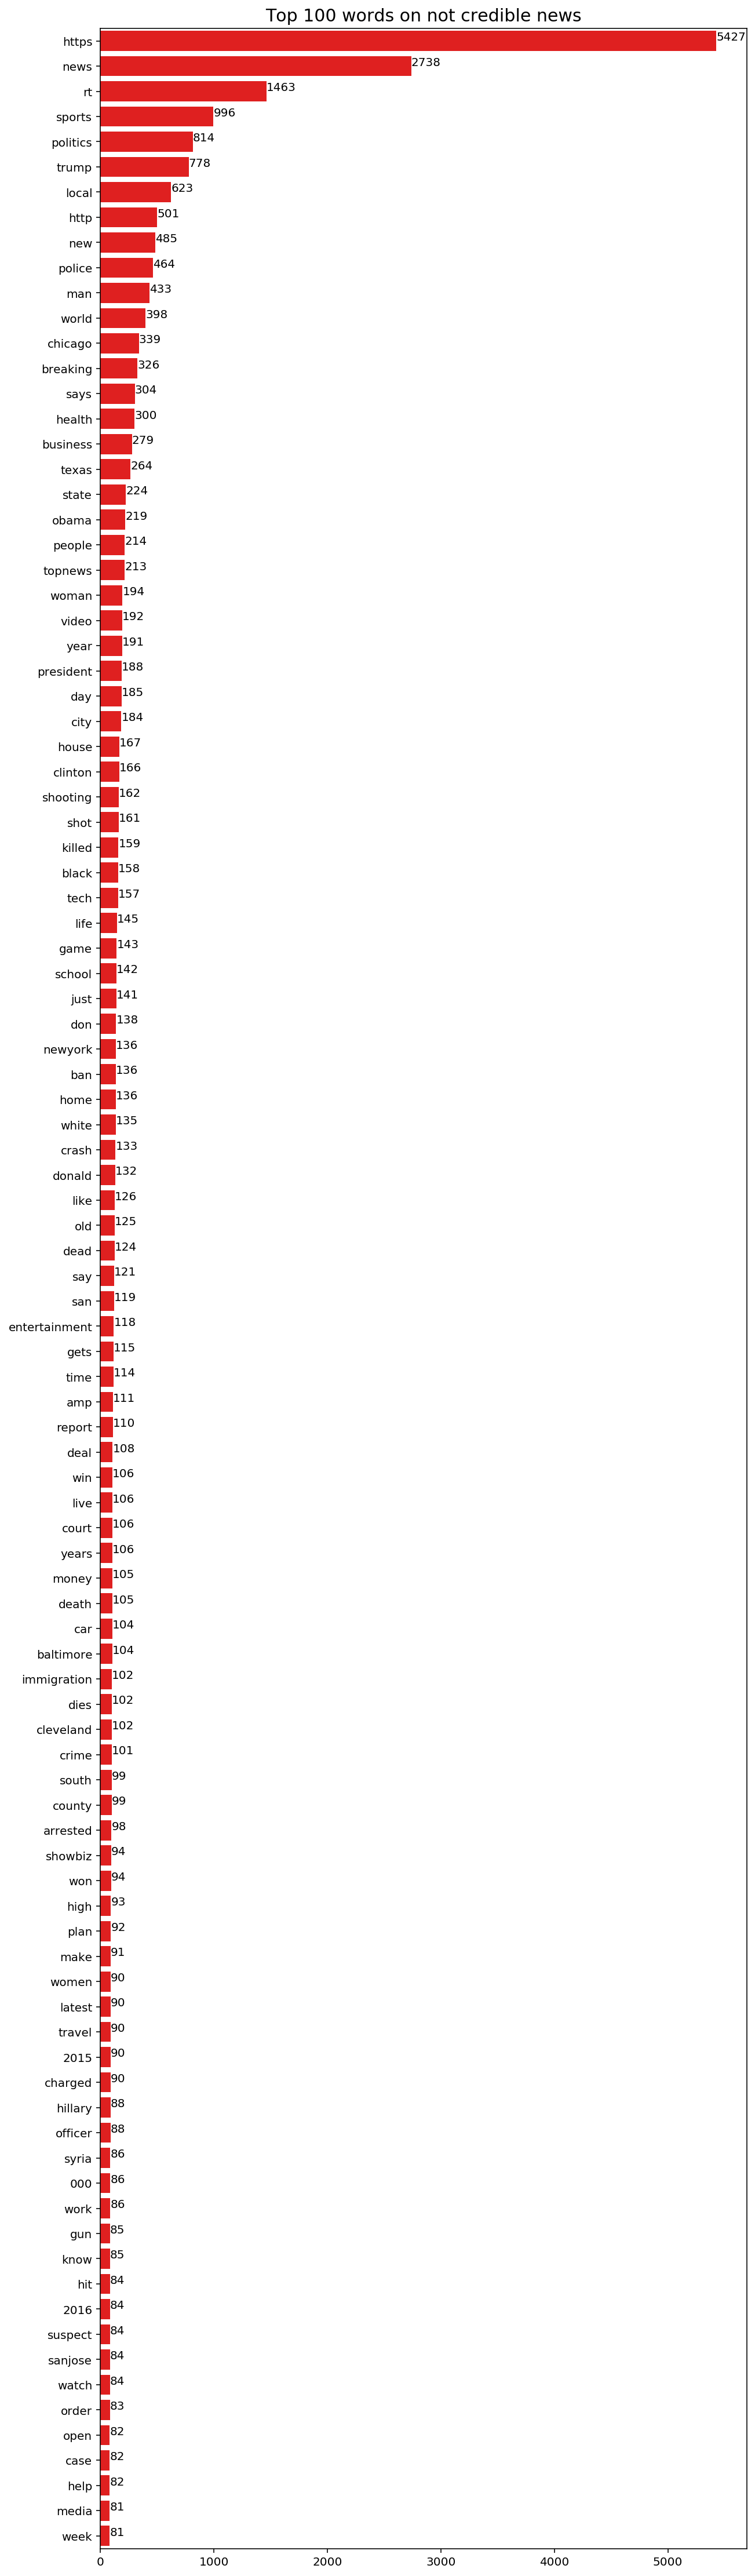

In [27]:
# Set up variables to contain top 100 most used words in not credible
news_not_credible_wc = news_not_credible_cvec_df.sum(axis = 0)
news_not_credible_top_100 = news_not_credible_wc.sort_values(ascending=False).head(100)

# Call function
bar_plot(news_not_credible_top_100.values, news_not_credible_top_100.index, 'Top 100 words on not credible news','r') 



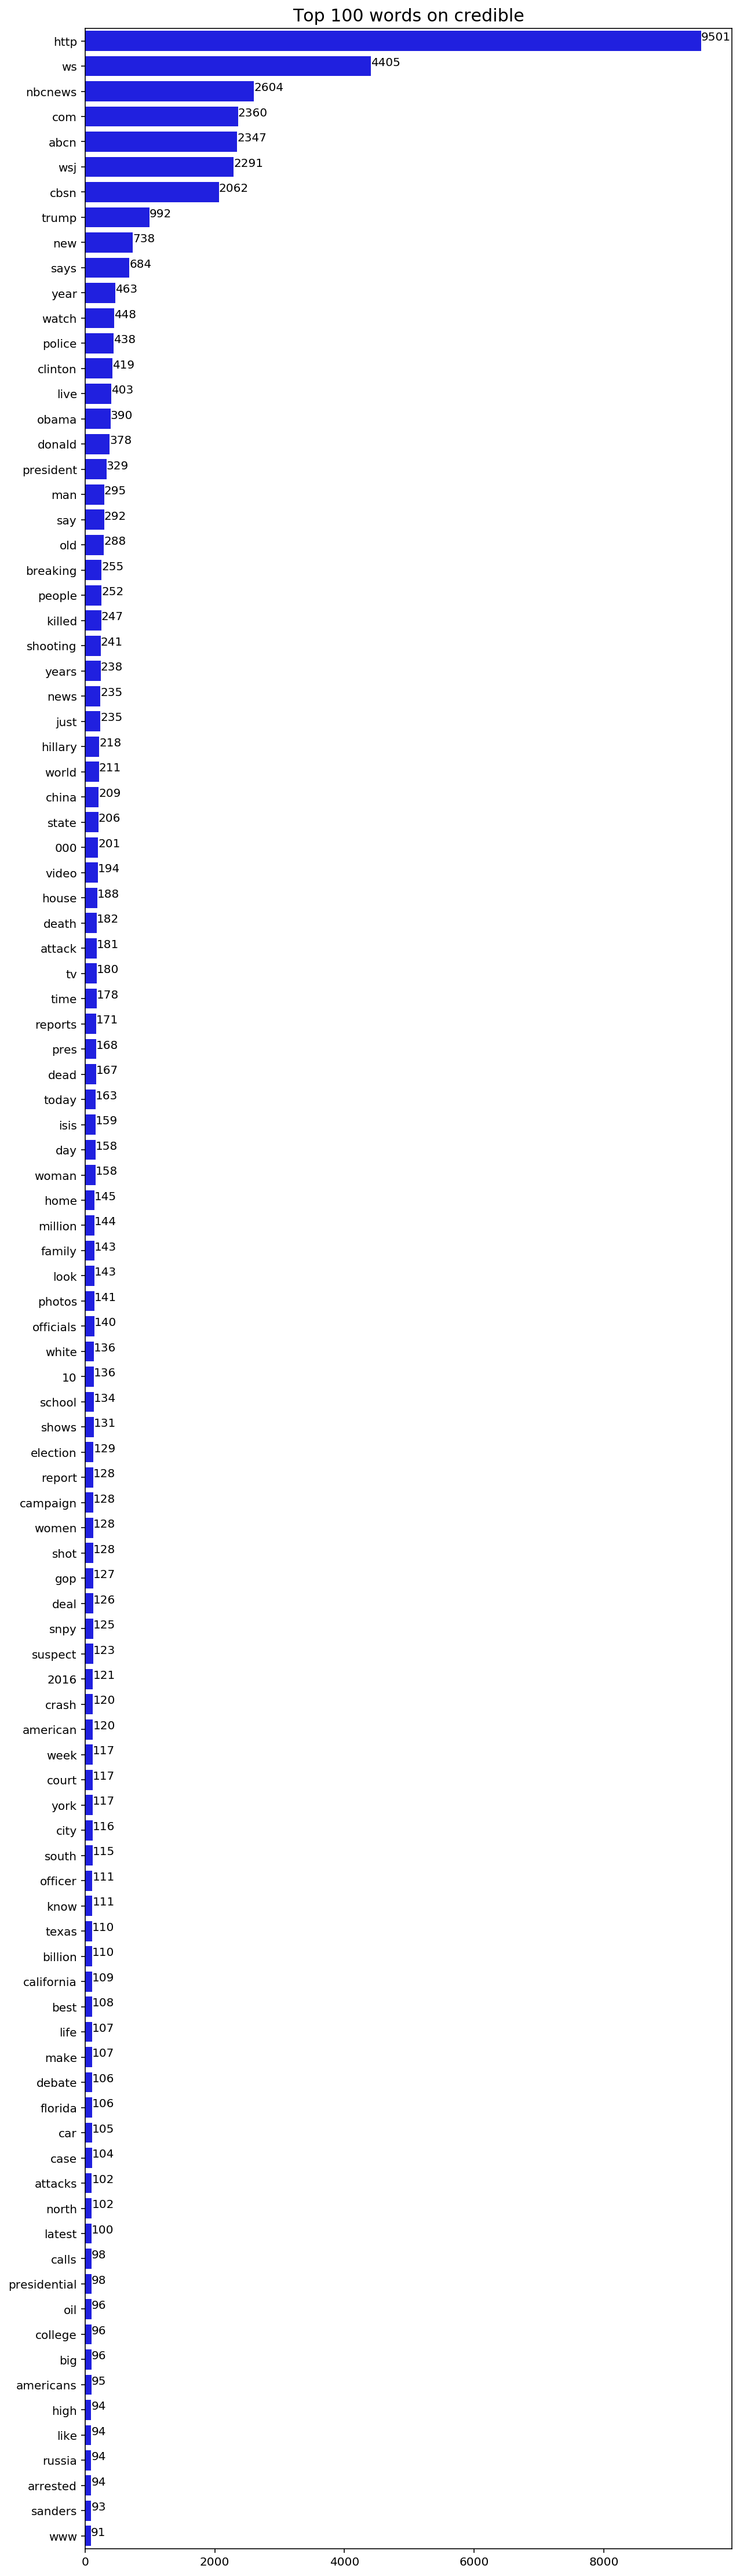

In [28]:
# Set up variables to contain top 100 most used words in credible
news_credible_wc = news_credible_cvec_df.sum(axis = 0)
news_credible_top_100 = news_credible_wc.sort_values(ascending=False).head(100)

# Call function
bar_plot(news_credible_top_100.values, news_credible_top_100.index, 'Top 100 words on credible','b') 

In [29]:
# Create list of unique words in top five
news_credible_100_set = set(news_credible_top_100.index)
news_not_credible_100_set = set(news_not_credible_top_100.index)

# Return common words
common_unigrams = news_not_credible_100_set.intersection(news_credible_100_set)

In [30]:
words_in_not_credible = news_not_credible_100_set - common_unigrams
words_in_not_credible

{'2015',
 'amp',
 'baltimore',
 'ban',
 'black',
 'business',
 'charged',
 'chicago',
 'cleveland',
 'county',
 'crime',
 'dies',
 'don',
 'entertainment',
 'game',
 'gets',
 'gun',
 'health',
 'help',
 'hit',
 'https',
 'immigration',
 'local',
 'media',
 'money',
 'newyork',
 'open',
 'order',
 'plan',
 'politics',
 'rt',
 'san',
 'sanjose',
 'showbiz',
 'sports',
 'syria',
 'tech',
 'topnews',
 'travel',
 'win',
 'won',
 'work'}

In [31]:
pickle.dump(words_in_not_credible, open("model/words_in_not_credible.pickle", "wb"))

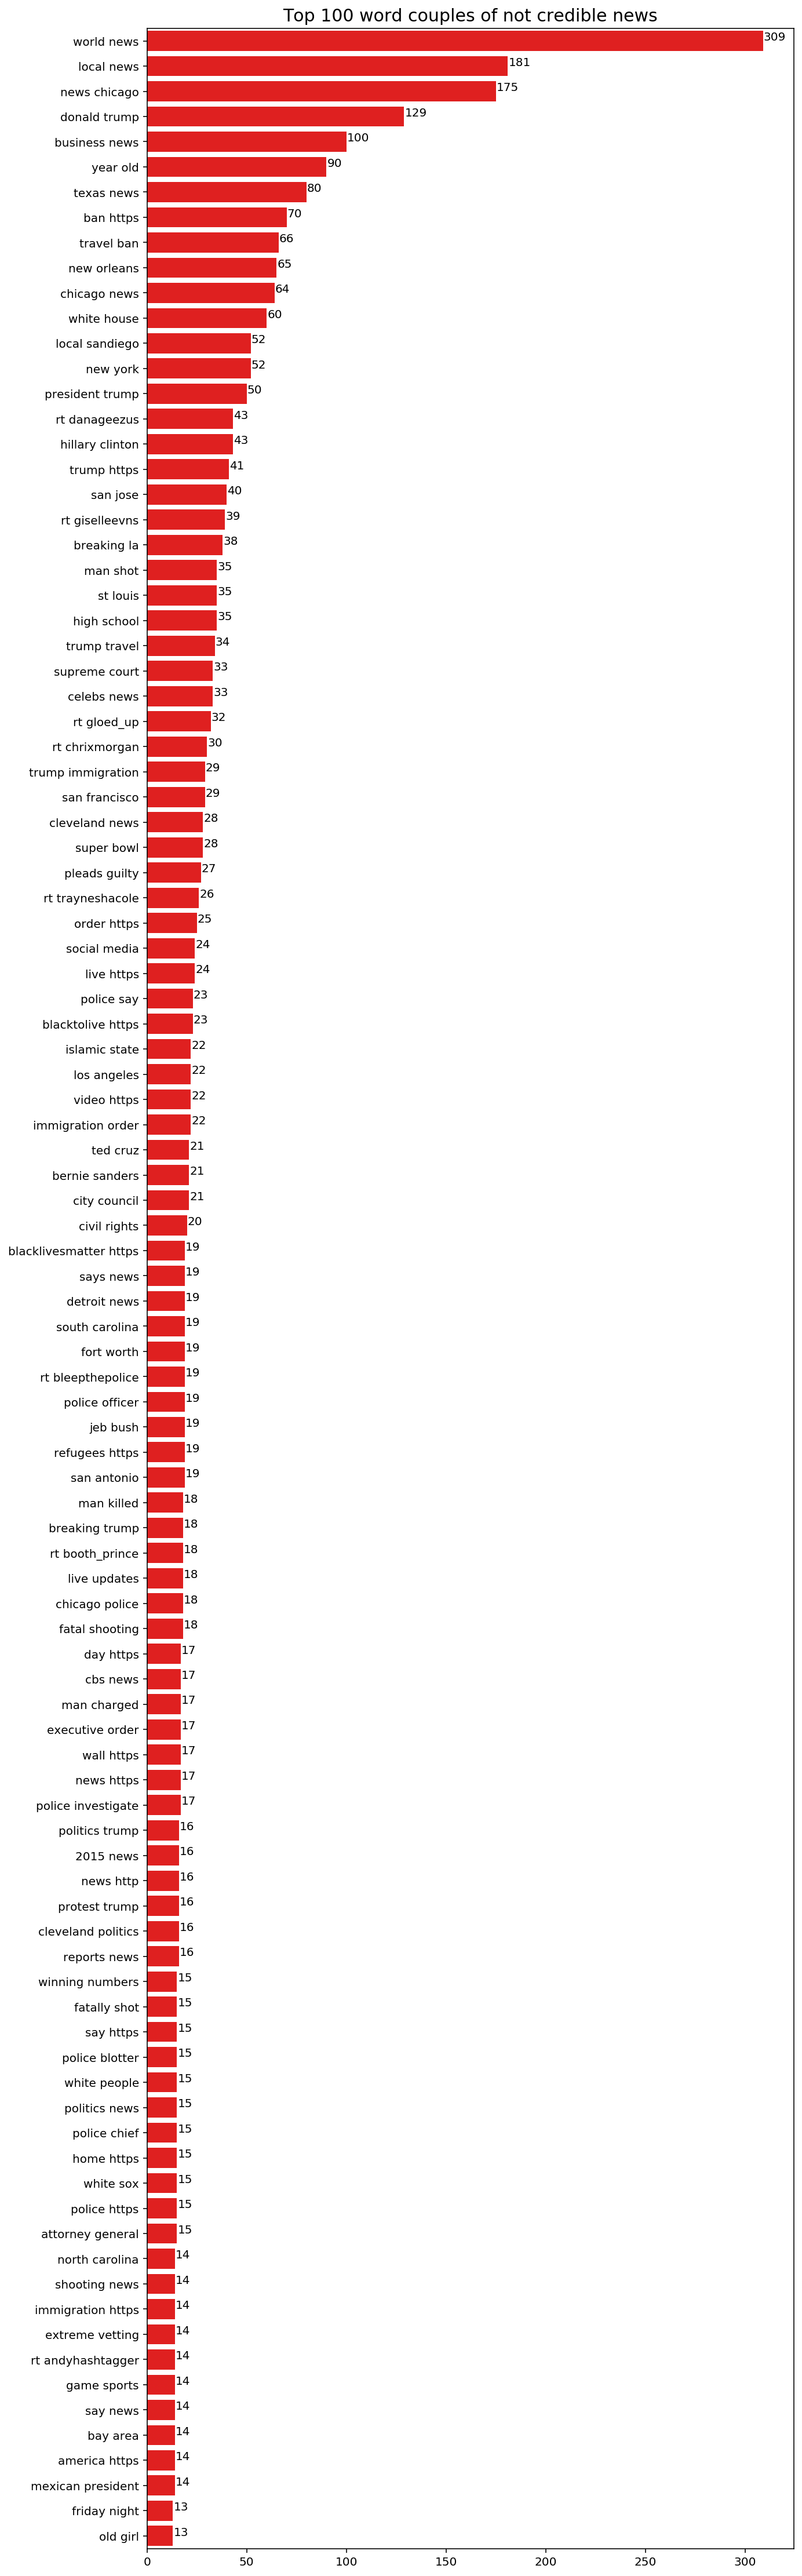

In [32]:
# Set up variables to contain top 100 most used words in not credible
news_not_credible_wc_bi = news_not_credible_cvec_df_bi.sum(axis = 0)
news_not_credible_top_100_bi = news_not_credible_wc_bi.sort_values(ascending=False).head(100)

# Call function
bar_plot(news_not_credible_top_100_bi.values, news_not_credible_top_100_bi.index, 'Top 100 word couples of not credible news','r') 

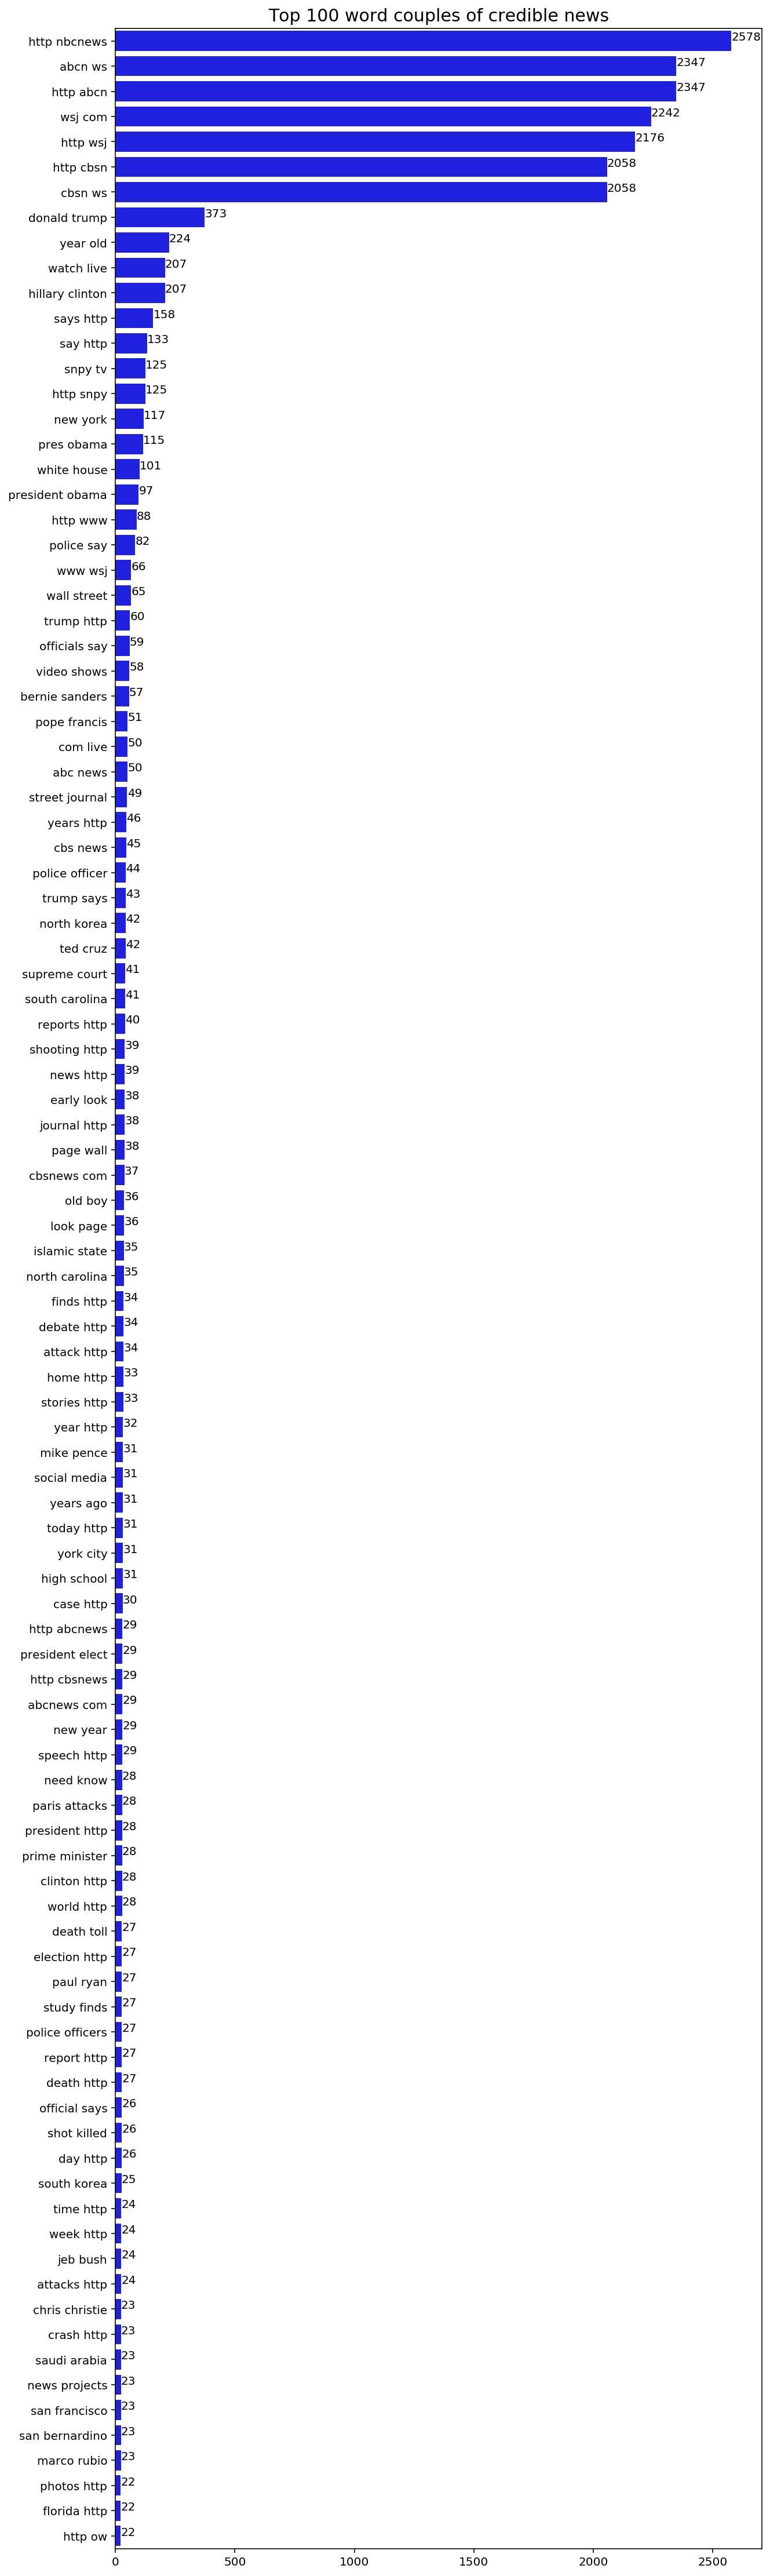

In [33]:
# Set up variables to contain top 100 most used words in Onion
news_credible_wc_bi = news_credible_cvec_df_bi.sum(axis = 0)
news_credible_top_100_bi = news_credible_wc_bi.sort_values(ascending=False).head(100)

# Call function
bar_plot(news_credible_top_100_bi.values, news_credible_top_100_bi.index, 'Top 100 word couples of credible news','b') 

In [34]:
news_credible_100_list_bi = set(news_credible_top_100_bi.index)
news_not_credible_100_list_bi = set(news_not_credible_top_100_bi.index)

# Return common words
common_bigrams = news_credible_100_list_bi.intersection(news_not_credible_100_list_bi)

In [35]:
words_2_in_not_credible = news_not_credible_100_list_bi - common_bigrams
words_2_in_not_credible

{'2015 news',
 'america https',
 'attorney general',
 'ban https',
 'bay area',
 'blacklivesmatter https',
 'blacktolive https',
 'breaking la',
 'breaking trump',
 'business news',
 'celebs news',
 'chicago news',
 'chicago police',
 'city council',
 'civil rights',
 'cleveland news',
 'cleveland politics',
 'day https',
 'detroit news',
 'executive order',
 'extreme vetting',
 'fatal shooting',
 'fatally shot',
 'fort worth',
 'friday night',
 'game sports',
 'home https',
 'immigration https',
 'immigration order',
 'live https',
 'live updates',
 'local news',
 'local sandiego',
 'los angeles',
 'man charged',
 'man killed',
 'man shot',
 'mexican president',
 'new orleans',
 'news chicago',
 'news https',
 'old girl',
 'order https',
 'pleads guilty',
 'police blotter',
 'police chief',
 'police https',
 'police investigate',
 'politics news',
 'politics trump',
 'president trump',
 'protest trump',
 'refugees https',
 'reports news',
 'rt andyhashtagger',
 'rt bleepthepolice',
 '

In [36]:
pickle.dump(words_2_in_not_credible, open("model/word_couples_in_not_credible.pickle", "wb"))

In [37]:
X = df_news['text']
y = df_news['credible']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [39]:
pipe = Pipeline([('cvec', CountVectorizer()),    
                 ('nb', MultinomialNB())])

# Tune GridSearchCV
pipe_params = {'cvec__ngram_range': [(1,1),(1,3),(1,2)],
               'nb__alpha': [.36, .6, 0.9, 1.2]}

gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
gs.fit(X_train, y_train);
print("Best score:", gs.best_score_)
print("Train score", gs.score(X_train, y_train))
print("Test score", gs.score(X_test, y_test))

gs.best_params_

Best score: 0.9495833333333333
Train score 0.9825
Test score 0.9543055555555555


{'cvec__ngram_range': (1, 1), 'nb__alpha': 1.2}

In [40]:
cvec = CountVectorizer(ngram_range=(1, 1))

In [41]:
X_traincv = cvec.fit_transform(X_train)
X_testcv = cvec.transform(X_test)

In [42]:
nb = MultinomialNB(alpha=1.2)

In [43]:
nb.fit(X_traincv,y_train)

MultinomialNB(alpha=1.2, class_prior=None, fit_prior=True)

In [44]:
all_accuracies = cross_val_score(estimator=nb, X=X_traincv, y=y_train, cv=5)

In [45]:
print(all_accuracies)

[0.95029762 0.9485119  0.95178571 0.95595238 0.9514881 ]


In [46]:
print(all_accuracies.mean()) 

0.9516071428571429


In [47]:
print(all_accuracies.std())

0.0024585567176266237


In [48]:
print('Train Accuracy Score :', nb.score(X_traincv, y_train))
print('Test Score :', nb.score(X_testcv, y_test))

Train Accuracy Score : 0.9825
Test Score : 0.9543055555555555


In [49]:
labels=['credible','not credible']
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.YlOrRd):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(shrink=0.7)
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45, ha='right', fontsize=12)
    plt.yticks(tick_marks, labels , fontsize=12)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

Confusion matrix
[[3401  199]
 [ 130 3470]]


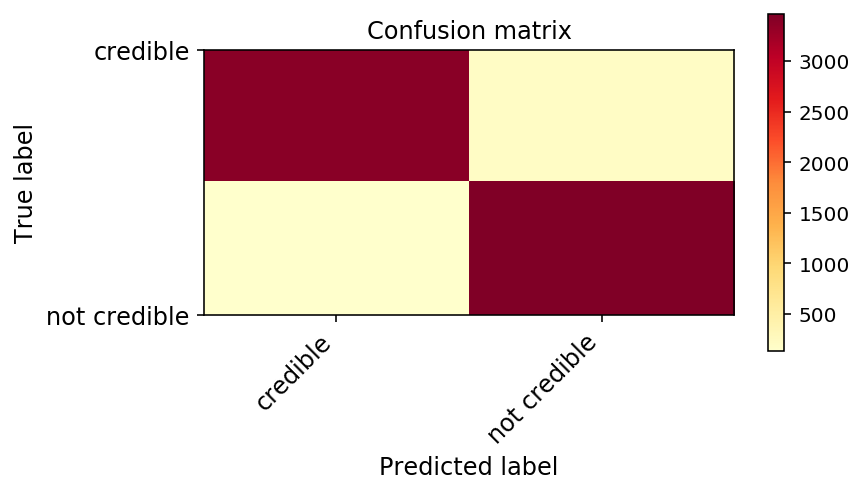

In [50]:
# Create the predictions for Y training data
preds = nb.predict(X_testcv)
cm = confusion_matrix(y_test, preds)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

In [51]:
# Assign True Neg, False Pos, False Neg, True Pos variables
cnf_matrix = np.array(cm).tolist()

tn_fp, fn_tp = cm

tn, fp = tn_fp
fn, tp = fn_tp

In [52]:
# Print Scores 
print("Accuracy:",round(metrics.accuracy_score(y_test, preds)*100, 2),'%')
print("Precision:",round(metrics.precision_score(y_test, preds)*100, 2), '%')
print("Recall:",round(metrics.recall_score(y_test, preds)*100, 2), '%')
print("Specificity:", round((tn/(tn+fp))*100, 2), '%')
print("Misclassification Rate:", round((fp+fn)/(tn+fp+fn+tn)*100, 2), '%')

Accuracy: 95.43 %
Precision: 94.58 %
Recall: 96.39 %
Specificity: 94.47 %
Misclassification Rate: 4.61 %


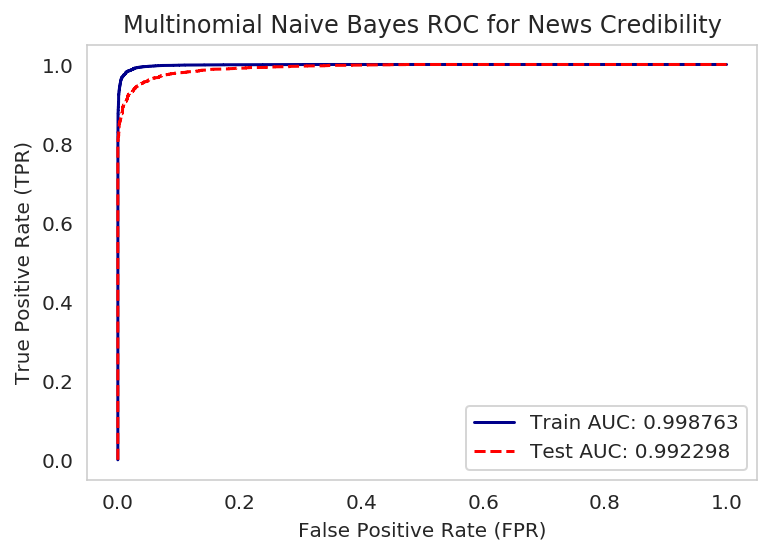

In [53]:
sns.set_style("whitegrid", {'axes.grid' : False})

scores_train = nb.predict_proba(X_traincv)
scores_test = nb.predict_proba(X_testcv)

y_scores_train = []
y_scores_test = []
for i in range(len(scores_train)):
    y_scores_train.append(scores_train[i][1])

for i in range(len(scores_test)):
    y_scores_test.append(scores_test[i][1])
    
fpr_rf_train, tpr_rf_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
fpr_rf_test, tpr_rf_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)

plt.plot(fpr_rf_train, tpr_rf_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_rf_train, tpr_rf_train))
plt.plot(fpr_rf_test, tpr_rf_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_rf_test, tpr_rf_test))
plt.title("Multinomial Naive Bayes ROC for News Credibility")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc='lower right')

In [54]:
#credible, should return 1
tweet1 = "Alabama police department apologizes after 2 of its officers were seen in a Facebook post posing for a photo next to a homeless quilt made from cardboard panhandling signs."

In [55]:
#not credible, should return 0
tweet2 = "RT @emptychampagne: Someone is in my mentions talmbout I need to treat the president elect with respect. Oh. The same respect y'all showedâ€¦"

In [56]:
#not credible, should return 0
tweet3 = "#FukushimaAgain Thermal and nuclear power plants in Ukraine are integrated in one system. is that supposed to be funny?"

In [57]:
#credible, should return 1
tweet4 = "Thousands of people fled to beaches in the south-eastern states of Australia as emergency-level fires spread"

In [58]:
#credible, should return 1
tweet5 = "The Asian American community became the fastest-growing racial or ethnic group in America over the last decade, experiencing the pride, pain and progress that come with growth. https://nbcnews.to/2rJlclT - @NBCAsianAmerica"

In [73]:
#not credible, should return 0
tweet6 = "At least 80 American terrorists were killed in Iranian missile strikes on US targets in Iraq, Iranian state television claimed today. VoiceOfNations"

In [59]:
pickle.dump(cvec, open("model/vectorizer.pickle", "wb"))

In [60]:
pickle.dump(nb, open("model/model_credibility.pickle", "wb"))

In [61]:
cvec_d = pickle.load(open("model/vectorizer.pickle", 'rb'))

In [62]:
model = pickle.load(open("model/model_credibility.pickle", 'rb'))

In [74]:
msg = cvec_d.transform([tweet6])

In [75]:
pred = model.predict(msg)
pred[0]

1